### Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

### Load Cleaned + Sentiment Data

In [ ]:
df = pd.read_csv(r"C:\Users\Dell\Pictures\playstore-fintech-cx\data\processed\reviews_sentiment_themes.csv")
df.head()


,review,rating,date,bank,source,sentiment_label,sentiment_score,themes
0,maaliif daddafee install gaafata,3,2025-11-28,Commercial Bank of Ethiopia (CBE),Google Play,neutral,0.00,[]
1,good app,5,2025-11-28,Commercial Bank of Ethiopia (CBE),Google Play,positive,0.70,[]
2,This application is very important and advanta...,5,2025-11-27,Commercial Bank of Ethiopia (CBE),Google Play,positive,0.52,['features']
3,why didn't work this app?,1,2025-11-27,Commercial Bank of Ethiopia (CBE),Google Play,neutral,0.00,[]
4,The app makes our life easier. Thank you CBE!,5,2025-11-27,Commercial Bank of Ethiopia (CBE),Google Play,neutral,0.00,[]


### Rating Distribution Per Bank

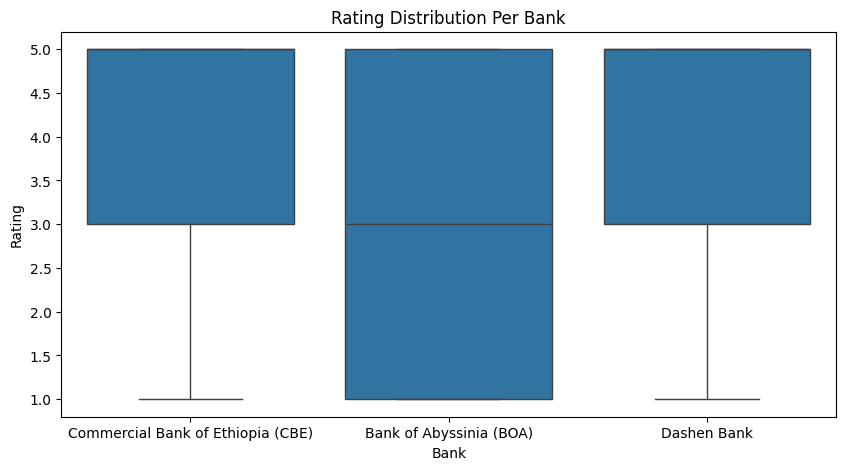

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="bank", y="rating")
plt.title("Rating Distribution Per Bank")
plt.xlabel("Bank")
plt.ylabel("Rating")
plt.show()


### Sentiment Count Per Bank

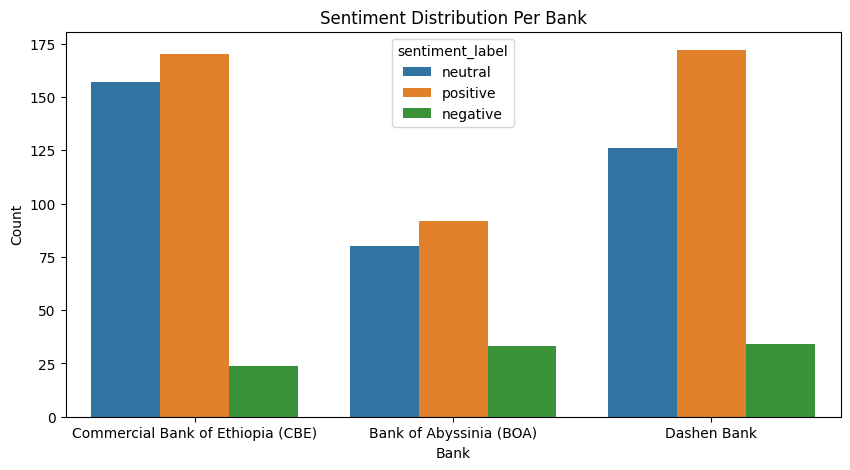

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="bank", hue="sentiment_label")
plt.title("Sentiment Distribution Per Bank")
plt.xlabel("Bank")
plt.ylabel("Count")
plt.show()


### WordCloud for Pain Points (Negative)

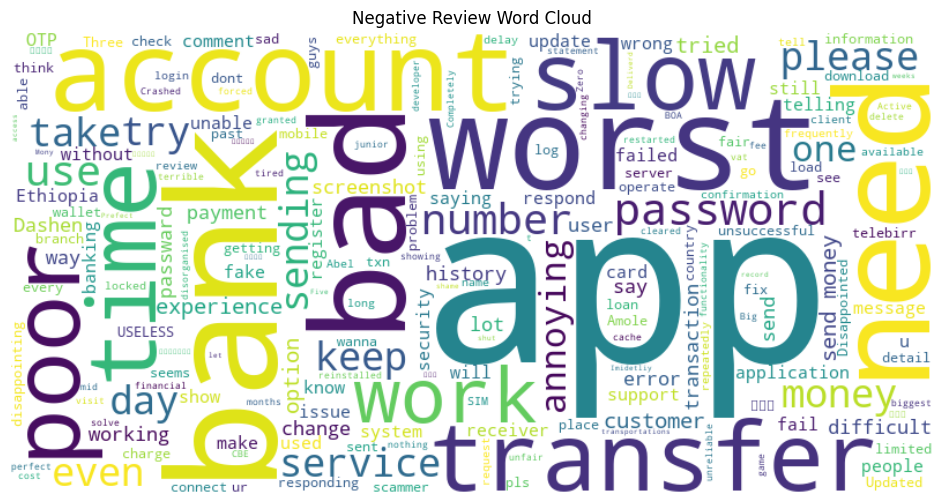

In [ ]:
neg_text = " ".join(df[df["sentiment_label"]=="negative"]["review"].tolist())

wc = WordCloud(width=800, height=400, background_color="white").generate(neg_text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Review Word Cloud")
plt.show()


### WordCloud for Drivers (Positive)

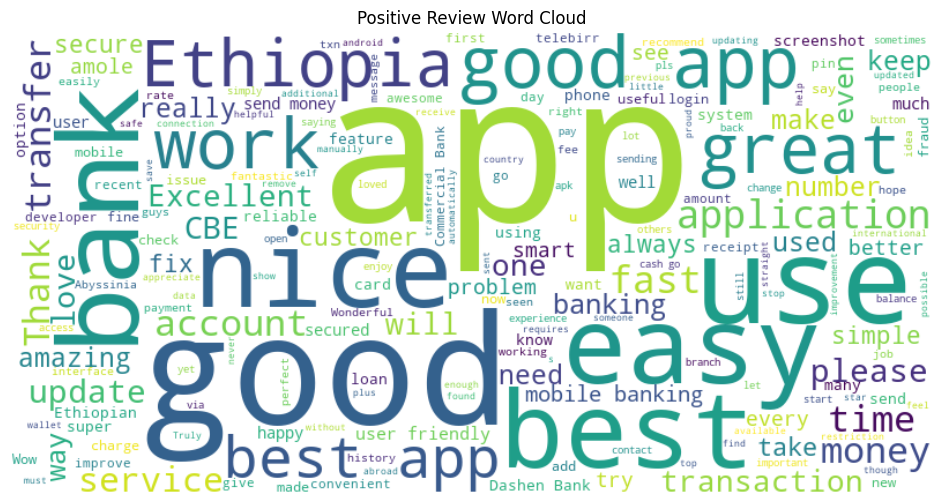

In [ ]:
pos_text = " ".join(df[df["sentiment_label"]=="positive"]["review"].tolist())

wc_pos = WordCloud(width=800, height=400, background_color="white").generate(pos_text)

plt.figure(figsize=(12,6))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Review Word Cloud")
plt.show()


### Identify Drivers & Pain Points Per Bank

In [ ]:
insights = (
    df.groupby(["bank", "sentiment_label"])
      .agg({"review":"count"})
      .reset_index()
)

insights


,bank,sentiment_label,review
0,Bank of Abyssinia (BOA),negative,33
1,Bank of Abyssinia (BOA),neutral,80
2,Bank of Abyssinia (BOA),positive,92
3,Commercial Bank of Ethiopia (CBE),negative,24
4,Commercial Bank of Ethiopia (CBE),neutral,157
5,Commercial Bank of Ethiopia (CBE),positive,170
6,Dashen Bank,negative,34
7,Dashen Bank,neutral,126
8,Dashen Bank,positive,172


### Extract Keyword Themes

In [ ]:
import re

themes = {
    "speed": ["fast", "slow", "delay"],
    "usability": ["easy", "hard", "navigation"],
    "crashes": ["crash", "freeze", "hang"],
    "login": ["login", "password", "otp"],
}

def count_theme(text_series, keywords):
    return text_series.str.contains("|".join(keywords), case=False, na=False).sum()

theme_results = {}

for bank in df["bank"].unique():
    theme_results[bank] = {
        theme: count_theme(
            df[df["bank"]==bank]["review"], keywords
        )
        for theme, keywords in themes.items()
    }

theme_results


{'Commercial Bank of Ethiopia (CBE)': {'speed': np.int64(9),
  'usability': np.int64(9),
  'crashes': np.int64(7),
  'login': np.int64(6)},
 'Bank of Abyssinia (BOA)': {'speed': np.int64(15),
  'usability': np.int64(18),
  'crashes': np.int64(5),
  'login': np.int64(10)},
 'Dashen Bank': {'speed': np.int64(28),
  'usability': np.int64(17),
  'crashes': np.int64(9),
  'login': np.int64(19)}}

### Recommendations (Auto-Generated)

In [ ]:
recs = {}

for bank in df["bank"].unique():
    b = theme_results[bank]
    recs[bank] = [
        f"Improve loading speed (found {b['speed']} speed-related reviews).",
        f"Fix app crashes/hanging (found {b['crashes']} crash-related reviews).",
        f"Enhance navigation usability (found {b['usability']} reviews).",
        "Add more user-friendly features (budgeting, analytics, shortcuts)."
    ]

recs


{'Commercial Bank of Ethiopia (CBE)': ['Improve loading speed (found 9 speed-related reviews).',
  'Fix app crashes/hanging (found 7 crash-related reviews).',
  'Enhance navigation usability (found 9 reviews).',
  'Add more user-friendly features (budgeting, analytics, shortcuts).'],
 'Bank of Abyssinia (BOA)': ['Improve loading speed (found 15 speed-related reviews).',
  'Fix app crashes/hanging (found 5 crash-related reviews).',
  'Enhance navigation usability (found 18 reviews).',
  'Add more user-friendly features (budgeting, analytics, shortcuts).'],
 'Dashen Bank': ['Improve loading speed (found 28 speed-related reviews).',
  'Fix app crashes/hanging (found 9 crash-related reviews).',
  'Enhance navigation usability (found 17 reviews).',
  'Add more user-friendly features (budgeting, analytics, shortcuts).']}